# HW4

In this assignment, you will implement object detection using YOLOv3 (You Only Look Once version 3) in Python. You will use the Darknet framework and pre-trained weights for YOLOv3, which can be found here: https://pjreddie.com/darknet/yolo/Links to an external site.

Your task is to write a Python script that loads an image, runs it through the YOLOv3 model, and displays the image with bounding boxes around detected objects. You can use any image of your choice for this task.

Here are the steps you should follow:

Install the necessary packages: numpy, opencv-python, and darknet.

Download the pre-trained weights for YOLOv3 from the link above and place them in a directory called "weights".

In [ ]:
# I tried to install darknetpy, its been impossible for my intelbased mac machine, not sure why, 
# I even tried on ubuntu docker container as below and it wont go through, therefore I will just use the commandline interaction using python.

# run in commandline
docker run --name hw4 -it -v $(pwd):/home ubuntu bash  

# inside docker container
apt update
apt upgrade
apt install curl
curl https://sh.rustup.rs -sSf | sh
source "$HOME/.cargo/env"
rustup default nightly
apt install python3
apt install python3-pip
pip install darknetpy

# the above doesnt work, so try this instead
# https://github.com/pjreddie/darknet.git is the darknet link from the tutorial,
# but turns out, this version doesnt support returning coordinates, so we need to use the forked repo
git clone https://github.com/AlexeyAB/darknet
cd darknet
make

# install opencv from source
git clone https://github.com/opencv/opencv.git
mkdir build_opencv
cd build_opencv
cmake -DCMAKE_BUILD_TYPE=Release -DBUILD_EXAMPLES=ON ../opencv
make -j7

# install opencv using brew
brew install opencv

# install opencv using pip (if you use darknetpy then you should install this, else this is not needed)
pip install opencv-python

In [2]:
import subprocess

def rundarknet(image_path):
    command = ["./darknet", "detector","test", "cfg/coco.data", "cfg/yolov3.cfg", "yolov3.weights", "-ext_output", image_path]
    response = subprocess.run(command, capture_output=True, text=True)
    if response.returncode == 0:
        return response.stdout
    else:
        return response.stderr

In [3]:
# Write a Python function called "detect_objects" that takes an image file path as input and returns the detected objects as a list of tuples, 
# where each tuple contains the object class and its bounding box coordinates (x, y, w, h).
# You can use the darknet.load_image function to load the image and the darknet.detect function to detect objects.
import re

def detect_objects(path):
    result = rundarknet(path)
    data = get_data(path, result.split('\n'))
    processed_data = []
    for ele in data:
        processed_data.append(process_object_string(ele))
    return processed_data

def get_data(path, arr):
    for i, ele in enumerate(arr):
        if path in ele:
            index = i
            break
    return arr[index+1:-1]

def process_object_string(string):
    obj = {
        "class": "",
        "percentage": 0,
        "x": 0,
        "y": 0,
        "w": 0,
        "h": 0,
    }
    string = string.replace("%\t", " ")
    string = string.replace(")", "")
    string = string.replace("(", " ")
    string = string.replace(":", " ")
    string = re.sub("\s\s+" , " ", string)
    processed = string.split(" ")
    obj["class"] = processed[0]
    obj["percentage"] = int(processed[1])
    obj["x"] = int(processed[3])
    obj["y"] = int(processed[5])
    obj["w"] = int(processed[7])
    obj["h"] = int(processed[9])
    return obj


In [6]:
# Write a Python function called "draw_boxes" that takes an image file path and 
# a list of detected objects as input and draws bounding boxes around the objects in the image using OpenCV. 
# You can use the cv2.rectangle function to draw rectangles.
import cv2
import random
from matplotlib import pyplot as plt

def draw_boxes(path, detected_objs):
    for obj in detected_objs:
        image = cv2.imread(path)
        window_name = obj['class']
        start_point = (obj['x'], obj['y'])
        end_point = (obj['x'] + obj['w'], obj['y'] + obj['h'])
        color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        thickness = 2
        image = cv2.rectangle(image, start_point, end_point, color, thickness)
        plt.imshow(image)
        plt.show()

====== Task 1 ======
[{'class': 'dog', 'percentage': 99, 'x': 58, 'y': 262, 'w': 147, 'h': 89}, {'class': 'person', 'percentage': 100, 'x': 190, 'y': 95, 'w': 86, 'h': 284}, {'class': 'horse', 'percentage': 100, 'x': 394, 'y': 137, 'w': 215, 'h': 206}]

====== Task 2 ======


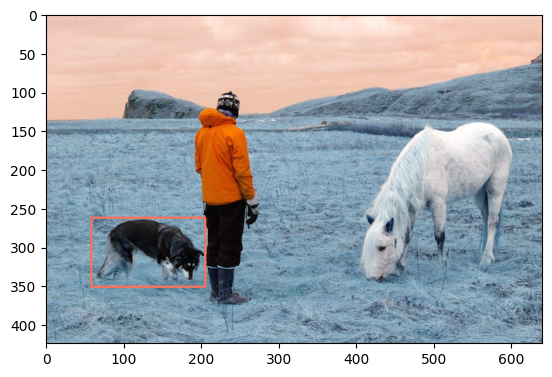

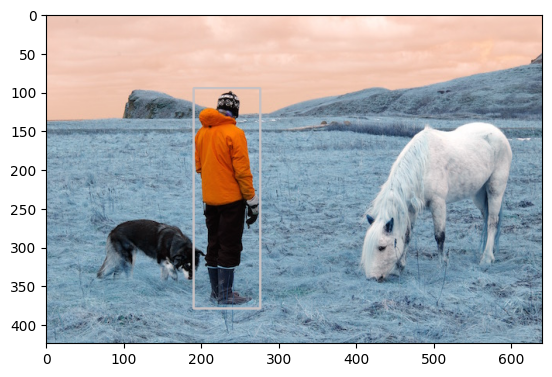

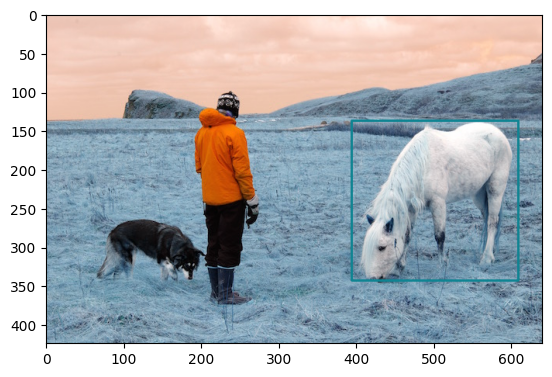

In [10]:
# Test your functions on an image of your choice and display the resulting image with bounding boxes around detected objects.
image_path = "./data/person.jpg"
print("====== Task 1 ======")
objs = detect_objects(image_path)
print(objs)
print()

print("====== Task 2 ======")
draw_boxes(image_path, objs)